#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Reading Data

In [2]:
data = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

#### Day 4 Problems

In [3]:
# 1. How many different companies are represented in the data set?
print(data["Company Name"].unique().size)

439


In [4]:
# 2. What is the total number of jobs created for businesses in Queens?
print(data[data["Borough"] == "Queens"]["Job created"].sum())

102.0


In [5]:
# 3. How many different unique email domains names are there in the data set?
domains = [email.split("@")[-1] for email in data[data["company email"].notna()]["company email"]]
print(np.unique(domains).size)

361


In [6]:
# 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
# 5. Save your result for the previous question as a CSV file.
NTA_filtered = data["NTA"].value_counts()[data["NTA"].value_counts() >= 5].index
data_filtered = data[data["NTA"].isin(NTA_filtered)].groupby(by="NTA")
results = pd.merge(round(data_filtered["Total Savings"].mean(),2), data_filtered["Job created"].sum().astype({'Job created': 'int32'}), on = "NTA")
results.rename(columns={"Total Savings": "Average Total Savings", "Job created":"Total Jobs Created"}, inplace=True)
results.to_csv("Average NTA Values.csv", index=True)

#### Day 5 Problems

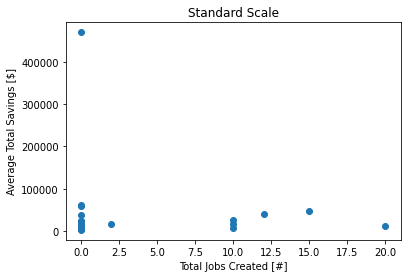

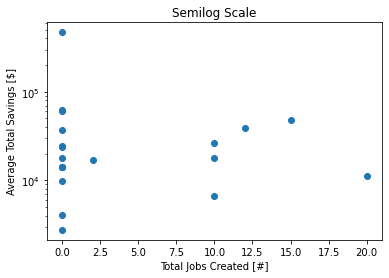

In [42]:
# Using the same data set and results that you were working with in the pandas action items section (Day 4), create a
# scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
plt.scatter(results["Total Jobs Created"], results["Average Total Savings"])
plt.xlabel("Total Jobs Created [#]")
plt.ylabel("Average Total Savings [$]")
plt.title("Standard Scale")
plt.show()

plt.scatter(results["Total Jobs Created"], results["Average Total Savings"])
plt.xlabel("Total Jobs Created [#]")
plt.ylabel("Average Total Savings [$]")
plt.yscale('log')
plt.title("Semilog Scale")
plt.show()

Text(0.5, 1.0, 'Logarithm of Average Total Savings per NTA')

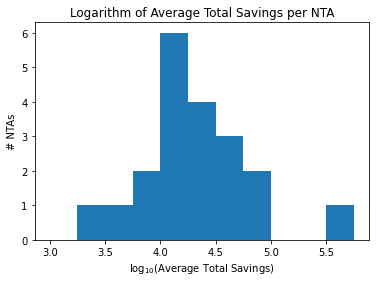

In [43]:
# histogram of the log of the average total savings.
plt.hist(np.log10(results["Average Total Savings"]),bins=np.arange(3, 6, 0.25))
plt.xlabel(r"$\log_{10}$(Average Total Savings)")
plt.ylabel("# NTAs")
plt.title("Logarithm of Average Total Savings per NTA")

Text(0.5, 1.0, 'Total Jobs Created for Each Month')

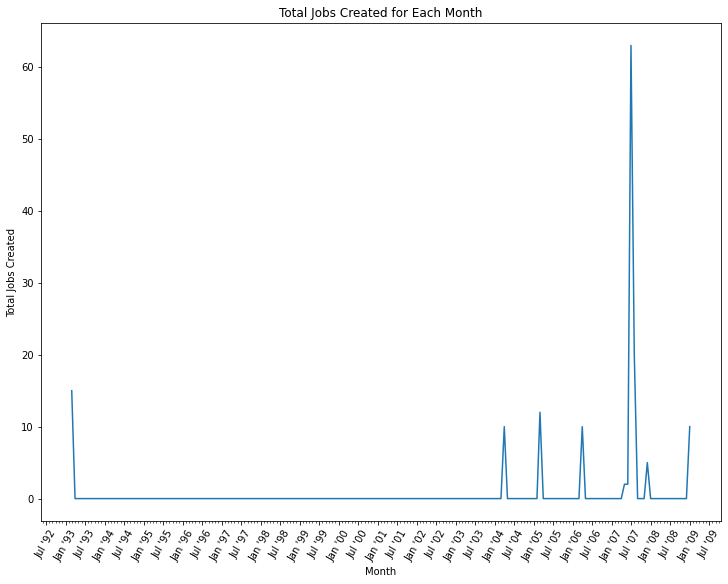

In [89]:
# line plot of the total jobs created for each month
NTA_Created_Jobs = data[~data["Job created"].isnull()][{"Job created", "Effective Date"}]
NTA_Created_Jobs["Effective Date"] = pd.to_datetime(NTA_Created_Jobs["Effective Date"])
fig,ax = plt.subplots(layout="constrained")
ax.plot(NTA_Created_Jobs.resample("M",on="Effective Date").sum())
ax.xaxis.set_major_locator(mpl.dates.MonthLocator((1, 7)))
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%b \'%y"))
plt.setp(ax.get_xticklabels(), rotation=60, ha="center")
plt.gcf().set_size_inches(10,8)
plt.xlabel("Month")
plt.ylabel("Total Jobs Created")
plt.title("Total Jobs Created for Each Month")